In [1]:
from sklearn import preprocessing, datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import os
import numpy as np
from keras.preprocessing import image
from skimage.io import imread
import cv2 as cv
from mlxtend.plotting import plot_decision_regions

In [2]:
def load_image_files(container_path):
    image_dir = pathlib.Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    train_label = []
    catStringArr = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img_pred = get_channels_hist_of_img(img)
            train_img.append(img_pred)
            train_label.append(os.path.basename(os.path.normpath(direc)))
            

    X = np.array(train_img)
    y = np.array(train_label)

    return X, y, categories


In [3]:
def get_channels_hist_of_img(image):
    blue = cv.calcHist([image],[0],None,[256],[0,256])
    green = cv.calcHist([image],[1],None,[256],[0,256])
    red = cv.calcHist([image],[2],None,[256],[0,256])
    return [blue, green, red]

In [4]:
X = []
y = []
X, y, labelStringArr = load_image_files("/home/pascal_steiger/Downloads/data/")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(labelStringArr)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

['MKD', 'HRV', 'ISL', 'IRL', 'ITA', 'HUN', 'LVA', 'GBR', 'FRA', 'LTU', 'AUT', 'SVN', 'FIN', 'ESP', 'NOR', 'BGR', 'PRT', 'SVK', 'BEL', 'EST', 'POL', 'CZE', 'NLD', 'CHE', 'DNK', 'SWE']
X_train: (21234, 3, 256, 1)
X_test: (5309, 3, 256, 1)
y_train: (21234,)
y_test: (5309,)
X_train: (21234, 768)
X_test: (5309, 768)
y_train: (21234,)
y_test: (5309,)


In [6]:
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_test, y_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

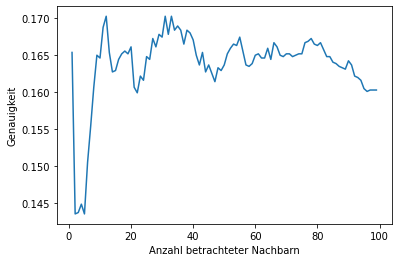

Maximale Genauigkeit bei k=12 und einer Genauigkeit von 0.1702768883028819


In [8]:
plt.plot(lix, liy)
plt.xlabel("Anzahl betrachteter Nachbarn")
plt.ylabel("Genauigkeit")
plt.savefig("KNNv3-data.png", dpi=300)
plt.show()
print("Maximale Genauigkeit bei k="+str(index+1)+" und einer Genauigkeit von "+str(acc))

In [9]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train, y_train)
print("Test Accuracy: "+str(neigh.score(X_test, y_test)))

Test Accuracy: 0.1661329817291392


In [10]:
from sklearn.metrics import confusion_matrix
preds = neigh.predict(X_test)
print(sorted(labelStringArr))
print(confusion_matrix(y_test, preds, labels=sorted(labelStringArr)))

['AUT', 'BEL', 'BGR', 'CHE', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'HRV', 'HUN', 'IRL', 'ISL', 'ITA', 'LTU', 'LVA', 'MKD', 'NLD', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'SWE']
[[ 33   9   9   8   4  11  14  11   0   2   2   5   1   7   6   7   4  12
    4   4  15   3   5   7   6   6]
 [  4  21  10   3   6  12  11  10   4   8   9   4   4  24   6  10   2   6
    2   2   6   4   6   2   7   4]
 [  3   8  51   3   1   4  21   9   2   4   0  11   2   3  17   4   2  12
   22   1   0   2   7   9   5   2]
 [  5   6  10  21   5   2  15  19   3   7   5   7   5   2   4   2   7  15
   15   1   1   5   4  13  13   2]
 [  5  17   7   7  16  11  20  14   5   2   5   6   8  14  12   6   4   8
    6   3  10   7   8   6   7   3]
 [  7  17   5   4   4  32   7   8   9   5   8   6   6  19   7   3   2   8
    1   4  17   2   5   4   3   3]
 [ 10   6  46   7  11   4  57  12   3  10   2  13   9   8  13   5   7  18
   24   2   9   9   9   7   3   3]
 [  2   1   6   6   2   2   6  44   2  12   3  10   0 

In [12]:
from sklearn.metrics import classification_report
target_names = sorted(labelStringArr)
print(classification_report(y_test, preds, target_names=sorted(labelStringArr)))

              precision    recall  f1-score   support

         AUT       0.21      0.17      0.19       195
         BEL       0.08      0.11      0.09       187
         BGR       0.14      0.25      0.18       205
         CHE       0.15      0.11      0.12       194
         CZE       0.09      0.07      0.08       217
         DNK       0.18      0.16      0.17       196
         ESP       0.15      0.19      0.16       307
         EST       0.11      0.23      0.15       188
         FIN       0.22      0.14      0.17       216
         FRA       0.09      0.08      0.08       207
         GBR       0.11      0.07      0.09       194
         HRV       0.09      0.11      0.10       184
         HUN       0.21      0.15      0.17       202
         IRL       0.28      0.45      0.34       219
         ISL       0.39      0.58      0.47       223
         ITA       0.11      0.08      0.10       191
         LTU       0.18      0.12      0.14       201
         LVA       0.10    